## Este exercício refere-se a um estudo de caso feito como trabalho de casa.

## Identificar em uma lista de filmes os melhores a serem adquiridos pela sua produtora. Levando-se em conta o orçamento e a nota obtida pelo filme nas redes sociais pelas pessoas, os filmes mais indicados são aqueles de baixo orçamento e score alto.

## Executar uma machine learning para identificar esses filmes para o arquivo do ano de 2016. O ML será treinado e testado com um arquivo de dados até 2015.

In [1]:
import pandas as pd
import numpy as np

# 1 - Importando os dados

In [2]:
df_raw = pd.read_csv("./Dados/imdb_train.zip")

In [3]:
# criando cópia do dataframe.
df = df_raw.copy(deep=True)

In [4]:
list(df) #olhando as variáveis

['Unnamed: 0',
 'color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# 2 - Tratando os dados

In [5]:
columns_to_drop = ['Unnamed: 0', 'gross', 'movie_title', 'plot_keywords'] #determinando algumas colunas para serem apagadas

In [6]:
df = df_raw.drop(columns_to_drop, axis=1) #apagando

In [7]:
# criando um dataset apenas com colunas numéricas.
df_numeric = df.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

In [8]:
df[numericas] = df[numericas].fillna(df.mean())#Tratando os nulos

In [9]:
df = df.fillna('na') # substitui os dados faltantes por 'na'
df = df.dropna() 
df.shape

(4937, 25)

# 3 - Criando dummies para as variáveis categóricas

In [10]:
n_dummies = df["genres"].str.get_dummies("|") #criando coluna dos generos individualmente, lendo o conteúdo da string

In [11]:
n_dummies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = df.join(n_dummies) #concatenando
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Color,James Cameron,723.00000,178.00000,0.0,855.000000,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,0,0,0,0,1,0,0,0,0,0
1,Color,Gore Verbinski,302.00000,169.00000,563.0,1000.000000,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.00000,148.00000,0.0,161.000000,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,...,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.00000,164.00000,22000.0,23000.000000,Christian Bale,27000.0,Action|Thriller,Tom Hardy,...,0,0,0,0,0,0,0,1,0,0
4,na,Doug Walker,139.92657,107.14872,131.0,644.082621,Rob Walker,131.0,Documentary,Doug Walker,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.shape

(4937, 51)

# 4 - Treinando o modelo de Machine Learning

Algorítmo: Supervisionado -> Regressão

Supervisionado - para prever uma variável contínua, no exemplo, as notas do público aos filmes.

Regressão - as notas são uma variável numérica e dependentes entre si, a nota seguinte é a anterior mais 1.

Passos:

    1) Importar o modelo desejado.
    2) Instanciar em uma variável com os parâmetros desejados (ainda não vimos os parâmetros).
    3) Separar nossos dados em variáveis explicativas (X) e explicadas/target (Y)
    4) Separar nossos dados em Treino e Teste
    5) Treinar o Modelo com o .fit()
    6) Analisar as métricas, se não estiver boas, voltamos aos passos anteriores de trabalhar com as variáveis.
    7) Estando tudo ok, rodamos previsões

__4.1 - Importar o modelo__

In [14]:
#modelos escolhidos

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

__4.2 - Instanciar em uma variável os parâmetros desejados__

In [15]:
modelo_MQO = LinearRegression()
modelo_RF = RandomForestRegressor()
modelo_gradient = GradientBoostingRegressor()

__4.3 - Separar os dados em variáveis explicativas X e explicadas/target Y__

In [16]:
df_numeric = df.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

In [17]:
numericas

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [18]:
df.corr()['imdb_score']

num_critic_for_reviews       0.303987
duration                     0.261837
director_facebook_likes      0.168952
actor_3_facebook_likes       0.052178
actor_1_facebook_likes       0.069684
num_voted_users              0.414215
cast_total_facebook_likes    0.079983
facenumber_in_poster        -0.058702
num_user_for_reviews         0.294641
budget                       0.027775
title_year                  -0.209660
actor_2_facebook_likes       0.082535
imdb_score                   1.000000
aspect_ratio                 0.059623
movie_facebook_likes         0.249753
Action                      -0.101180
Adventure                   -0.007090
Animation                    0.025362
Biography                    0.158382
Comedy                      -0.171390
Crime                        0.051645
Documentary                  0.103933
Drama                        0.297136
Family                      -0.063174
Fantasy                     -0.045948
Film-Noir                    0.036934
Game-Show   

In [19]:
#criando o x e o y
X = df[numericas].drop(['imdb_score'], axis = 1)
y = df['imdb_score']

__4.4 - Separar dados em Treino e Teste__

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [22]:
X_train.shape

(3702, 40)

In [23]:
y_train.shape

(3702,)

__4.5 - Treinar o modelo com o .fit()__

__Modelo Linear__

In [24]:
modelo_MQO.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
modelo_MQO.coef_

array([ 2.98993907e-03,  1.48029639e-03, -1.68910075e-06,  2.43505610e-05,
        4.12611760e-05,  3.21653209e-06, -4.07259288e-05, -1.93250567e-02,
       -4.18012769e-04,  2.27829049e-11, -2.62183486e-02,  3.74095268e-05,
        9.01220006e-02, -3.04177757e-06, -2.18292961e-01, -1.03059431e-01,
        5.64586657e-01,  2.81692915e-01, -1.11137196e-01,  8.36088654e-02,
        1.26628036e+00,  5.56039558e-01, -1.28305065e-01, -5.57278409e-02,
       -1.26161699e-01, -3.19845888e+00,  6.09769638e-02, -3.98695802e-01,
       -1.46512077e-01, -9.34120393e-02,  9.88836407e-02,  4.91745557e-01,
        3.33203994e-01, -8.90505221e-02, -1.14797139e-01,  5.48870677e-01,
        8.66549154e-05, -1.99176838e-01,  7.49792467e-02, -1.97042368e-02])

__Modelo Gradient__

In [26]:
modelo_gradient = GradientBoostingRegressor(max_depth=3)

In [27]:
modelo_gradient.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

__Modelo Random Forest__

In [28]:
modelo_RF.fit(X_train, y_train)

C:\Users\Marcos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

__4.6 - Analisando as métricas__

In [29]:
modelo_MQO.score(X_train, y_train)

0.45385715929980913

In [30]:
modelo_MQO.score(X_test, y_test)

0.4090410809428301

In [31]:
modelo_gradient.score(X_train, y_train)

0.6737391827565984

In [32]:
modelo_gradient.score(X_test, y_test)

0.5321711399452512

In [33]:
modelo_RF.score(X_train, y_train)

0.9152811813186713

In [34]:
modelo_RF.score(X_test, y_test)

0.4960036846491905

In [35]:
df['yhat'] = modelo_gradient.predict(X)

In [36]:
df['erro'] = df['yhat'] - df['imdb_score']

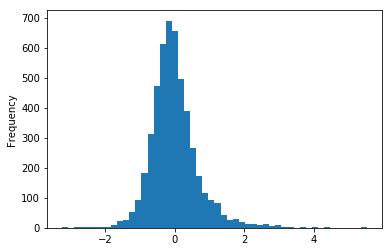

In [37]:
%matplotlib inline
df['erro'].plot.hist(bins=50)

In [38]:
#importando as bibliotecas para medir o MSE (erros médios quadráticos) e o MAE (erros médios absolutos)

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [39]:
# primeiro modelo - regressão linear
yhat_train = modelo_MQO.predict(X_train) # previsao dos dados de treino para calcular as métricas
yhat_test = modelo_MQO.predict(X_test) # previsao dos dados de teste para calcular métricas

print('TREINO - MSE:', mean_squared_error(y_train, yhat_train), 'MAE:', median_absolute_error(y_train, yhat_train),'R2:', r2_score(y_train, yhat_train))
print('TESTE - MSE:', mean_squared_error(y_test, yhat_test), 'MAE:', median_absolute_error(y_test, yhat_test), 'R2:', r2_score(y_train, yhat_train))

TREINO - MSE: 0.6927150269005381 MAE: 0.47138523671547006 R2: 0.4538571592998092
TESTE - MSE: 0.7382613301161235 MAE: 0.48013559051332955 R2: 0.4538571592998092


In [40]:
# segundo modelo -  gradient
yhat_train = modelo_gradient.predict(X_train) # previsao dos dados de treino para calcular as métricas
yhat_test = modelo_gradient.predict(X_test) # previsao dos dados de teste para calcular métricas

print('TREINO - MSE:', mean_squared_error(y_train, yhat_train), 'MAE:', median_absolute_error(y_train, yhat_train), 'R2:', r2_score(y_train, yhat_train))
print('TESTE - MSE - test', mean_squared_error(y_test, yhat_test), 'MAE - test', median_absolute_error(y_test, yhat_test),'R2 - test',r2_score(y_test, yhat_test))


TREINO - MSE: 0.4138217219941955 MAE: 0.3504460683977437 R2: 0.6737391827565984
TESTE - MSE - test 0.584439874503893 MAE - test 0.39760625586365617 R2 - test 0.5321711399452512


In [41]:
# terceiro modelo -  random forest
yhat_train = modelo_RF.predict(X_train) # previsao dos dados de treino para calcular as métricas
yhat_test = modelo_RF.predict(X_test) # previsao dos dados de teste para calcular métricas

print('TREINO - MSE:', mean_squared_error(y_train, yhat_train), 'MAE:', median_absolute_error(y_train, yhat_train), 'R2:', r2_score(y_train, yhat_train))
print('TESTE - MSE - test', mean_squared_error(y_test, yhat_test), 'MAE - test', median_absolute_error(y_test, yhat_test),'R2 - test',r2_score(y_test, yhat_test))


TREINO - MSE: 0.10745540248514317 MAE: 0.14999999999999858 R2: 0.9152811813186713
TESTE - MSE - test 0.6296224291497975 MAE - test 0.40999999999999925 R2 - test 0.4960036846491904


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(modelo_gradient, X, y, cv=10, )

array([0.58798324, 0.64824948, 0.58350223, 0.63598368, 0.50260091,
       0.55383974, 0.52803756, 0.54621812, 0.57712503, 0.29372488])

In [44]:
np.array([0.58789435, 0.64824948, 0.58350223, 0.63599593, 0.50295823,
       0.55353074, 0.52839646, 0.54628436, 0.57728171, 0.29239885]).mean()

0.545649234

In [45]:
cross_val_score(modelo_MQO, X, y, cv=10, )

array([0.46867452, 0.46976398, 0.42231374, 0.51692784, 0.42736833,
       0.44115495, 0.36933885, 0.37876858, 0.46455572, 0.25811714])

In [46]:
np.array([0.46867452, 0.46976398, 0.42231374, 0.51692784, 0.42736833,
       0.44115495, 0.36933885, 0.37876858, 0.46455572, 0.25811714]).mean()

0.421698365

In [47]:
cross_val_score(modelo_RF, X, y, cv=10, )

array([0.52547163, 0.62878661, 0.53063419, 0.59567673, 0.45343734,
       0.53767251, 0.43250664, 0.51522626, 0.54411249, 0.20107806])

In [48]:
np.array([0.5617015 , 0.59907474, 0.53666253, 0.60975993, 0.50293805,
       0.56611108, 0.44608221, 0.49497528, 0.53507382, 0.25499481]).mean()

0.510737395

# 5 - Treinando o Modelo Escolhido

In [49]:
X = df[numericas].drop(['imdb_score'], axis = 1)
Y = df['imdb_score']

modelo_final_gradient = GradientBoostingRegressor(max_depth=3).fit(X,Y)

print(modelo_gradient.score(X_train, y_train))
print(modelo_gradient.score(X_test, y_test))

0.6737391827565984
0.5321711399452512


# 6 - Rodar as previsões

In [50]:
df_ano16 = pd.read_csv('./Dados/imdb_test.zip')

In [51]:
len(list(df_ano16))

29

In [52]:
apagar_real = ['Unnamed: 0', 'plot_keywords'] #identificando colunas que não são necessárias
df_ano16  = df_ano16 .drop(apagar_real, axis=1) #apagando essas colunas

In [53]:
# criando um dataset apenas com colunas numéricas.

df_numeric = df_ano16.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

In [54]:
#Tratando os nulos

df_ano16[numericas] = df_ano16[numericas].fillna(df.mean())

In [55]:
df_ano16 = df_ano16.fillna('na') # substitui os dados faltantes por 'na'
df_ano16 = df_ano16.dropna() 
df_ano16.shape

(106, 27)

In [56]:
n_dummies = df_ano16["genres"].str.get_dummies("|") #criando dummies

In [57]:
df_ano16 = df_ano16.join(n_dummies)
df_ano16.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,3.30249e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
1,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,4.07197e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
2,Color,Justin Lin,322.0,122.0,681.0,105.0,Melissa Roxburgh,998.0,1.30469e+08,Action|Adventure|Sci-Fi|Thriller,...,0,0,0,0,0,1,0,1,0,0
3,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,1.24052e+08,Action|Adventure|Drama|Romance,...,0,0,0,0,1,0,0,0,0,0
4,Color,Bryan Singer,396.0,144.0,0.0,1000.0,Michael Fassbender,34000.0,1.54985e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0


In [58]:
#criando algumas colunas que tem no modelo e não tem no arquivo final.
df_ano16['Documentary']='0'
df_ano16['Film-Noir']='0'
df_ano16['Game-Show']='0'
df_ano16['Reality-TV']='0'
df_ano16['Short']='0'
df_ano16['News']='0'

In [59]:
X_Real = df_ano16[list(X)] #determinando o X

In [60]:
Y_real = df_ano16['imdb_score'] #determinando o Y

In [61]:
yhat_real = modelo_final_gradient.predict(X_Real) #

In [62]:
yhat_real

array([7.04400918, 6.92298653, 5.8494107 , 6.25677256, 6.35557358,
       5.93307341, 6.65077052, 5.75414403, 4.73050838, 5.55671513,
       5.86883655, 6.25677256, 5.70929315, 6.39129163, 5.62001221,
       5.87813588, 4.73050838, 5.57593881, 6.26218349, 5.46217231,
       5.58324816, 6.27703366, 5.62745549, 5.67470453, 6.04804827,
       6.63613412, 6.16661307, 5.11631082, 7.26580039, 5.61307924,
       6.70235336, 6.55200519, 5.63615938, 6.23336605, 6.03522591,
       5.44758248, 5.91926362, 5.8311716 , 5.55060138, 6.3388285 ,
       5.70929315, 5.61246532, 5.52176701, 6.10039932, 5.24539581,
       6.65077052, 6.2277157 , 6.71878385, 5.92155494, 6.71878385,
       6.04857736, 6.15394041, 6.74653468, 5.48809292, 6.6504673 ,
       5.26872192, 6.32968077, 6.0754462 , 5.6143327 , 6.50303256,
       5.56550929, 6.43300491, 4.60342598, 5.41949387, 6.14312278,
       5.48809292, 6.0299373 , 5.40668451, 6.2577357 , 5.79855179,
       6.440831  , 6.0388974 , 5.9489911 , 5.42501723, 5.11113

In [63]:
#adicionando a lista resultante como coluna no dataset
df_ano16['novo_score'] = yhat_real
df_ano16.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Thriller,War,Western,Documentary,Film-Noir,Game-Show,Reality-TV,Short,News,novo_score
0,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,3.30249e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,0,0,0,0,7.044009
1,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,4.07197e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,0,0,0,0,6.922987
2,Color,Justin Lin,322.0,122.0,681.0,105.0,Melissa Roxburgh,998.0,1.30469e+08,Action|Adventure|Sci-Fi|Thriller,...,1,0,0,0,0,0,0,0,0,5.849411
3,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,1.24052e+08,Action|Adventure|Drama|Romance,...,0,0,0,0,0,0,0,0,0,6.256773
4,Color,Bryan Singer,396.0,144.0,0.0,1000.0,Michael Fassbender,34000.0,1.54985e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,0,0,0,0,6.355574


In [64]:
#criando uma coluna da variação entre o novo score e o budget
df_ano16['variacao_novoscore_budget'] = (df_ano16['budget']/1000000)/(df_ano16['novo_score'])

In [65]:
#criando datframe com o resultado
df_resultado = pd.DataFrame(df_ano16, columns=['movie_title','gross', 'genres','budget', 'imdb_score','novo_score', 'variacao_novoscore_budget'])

# RESPOSTA  

## 10 melhores filmes, de acordo com o conceito do exercício: baixo orçamento e score alto.

In [66]:
df_resultado.sort_values(by=['variacao_novoscore_budget'], ascending=True).head(10)

,movie_title,gross,genres,budget,imdb_score,novo_score,variacao_novoscore_budget
101,Fight to the Finish,na,Action|Romance|Sport,150000.0,4.0,5.208116,0.028801
104,The Little Ponderosa Zoo,na,Family,500000.0,5.2,6.442389,0.077611
103,Rodeo Girl,na,Family,500000.0,5.7,5.607470,0.089167
102,Alleluia! The Devil's Carnival,na,Horror|Musical,500000.0,7.4,4.599333,0.108711
98,The Dog Lover,na,Drama,2000000.0,4.8,5.709131,0.350316
89,Airlift,na,Action|Drama|History|Thriller|War,4400000.0,8.5,7.138738,0.616355
93,Compadres,3.10527e+06,Action|Comedy,3000000.0,5.0,4.745172,0.632222
92,The Masked Saint,123777,Action|Biography|Crime|Drama|Family|Fantasy,3500000.0,4.7,5.379701,0.650594
94,Antibirth,na,Horror,3500000.0,6.3,5.141265,0.680766
99,God's Not Dead 2,2.07731e+07,Drama,5000000.0,3.4,6.188879,0.807901


## Os 10 piores filmes, de acordo com o conceito do exercício: score alto mas orçamento alto.

In [67]:
df_resultado.sort_values(by=['variacao_novoscore_budget'], ascending=False).head(10)

,movie_title,gross,genres,budget,imdb_score,novo_score,variacao_novoscore_budget
1,Captain America: Civil War,4.07197e+08,Action|Adventure|Sci-Fi,250000000.0,8.2,6.922987,36.111583
0,Batman v Superman: Dawn of Justice,3.30249e+08,Action|Adventure|Sci-Fi,250000000.0,6.9,7.044009,35.491152
2,Star Trek Beyond,1.30469e+08,Action|Adventure|Sci-Fi|Thriller,185000000.0,7.5,5.849411,31.627118
9,Alice Through the Looking Glass,7.68466e+07,Adventure|Family|Fantasy,170000000.0,6.4,5.556715,30.593614
5,Suicide Squad,1.61087e+08,Action|Adventure|Comedy|Sci-Fi,175000000.0,6.9,5.933073,29.495674
3,The Legend of Tarzan,1.24052e+08,Action|Adventure|Drama|Romance,180000000.0,6.6,6.256773,28.768826
11,The Legend of Tarzan,1.24052e+08,Action|Adventure|Drama|Romance,180000000.0,6.6,6.256773,28.768826
7,Independence Day: Resurgence,1.02316e+08,Action|Adventure|Sci-Fi,165000000.0,5.5,5.754144,28.674986
4,X-Men: Apocalypse,1.54985e+08,Action|Adventure|Sci-Fi,178000000.0,7.3,6.355574,28.006914
10,Warcraft,4.6979e+07,Action|Adventure|Fantasy,160000000.0,7.3,5.868837,27.262644
